In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import random

from tqdm import tqdm  #show a progress meter in the loop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed.csv"
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed.csv"
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed.csv"
df_proceeded = pd.read_csv(path)

In [ ]:
df_proceeded

In [ ]:
#df_proceeded = df_proceeded.sort_values(by=['Time'])

Journey 102 ***S Rübenkamp to U Wandsbek Markt***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed102.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed102.csv"
df_proceeded102 = pd.read_csv(path)
#df_proceeded102 = df_proceeded102.sort_values(by=['Time'])

Journey 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed201.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed201.csv"
df_proceeded201 = pd.read_csv(path)
#df_proceeded201 = df_proceeded201.sort_values(by=['Time'])

Journey 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_0420_data_processed202.csv"
path = "/content/drive/My Drive/Colab Notebooks/Thesis/ist_01_12_19_data_processed202.csv"
df_proceeded202 = pd.read_csv(path)
#df_proceeded202 = df_proceeded202.sort_values(by=['Time'])

## **Preprocessing**

Journey 101 ***U Wandsbek Markt to S Rübenkamp***

In [ ]:
data = df_proceeded[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data

In [ ]:
data.loc[data.Precipitation == -499 ]=0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
data.loc[data.Precipitation == -499 ]

,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
#data = data.loc[data['dayofweek'].isin([1])]

In [ ]:
data = data.loc[data['Node A to Node B'].isin(['U Wandsbek Markt|Wandsbeker Allee',
       'Wandsbeker Allee|U Straßburger Straße',
       'U Straßburger Straße|U Alter Teichweg',
       'U Alter Teichweg|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Habichtstraße',
       'U Habichtstraße|Habichtsplatz', 'Habichtsplatz|Neue Wöhr',
       'Neue Wöhr|Hartzloh', 'Hartzloh|AK Barmbek',
       'AK Barmbek|Hebebrandstraße', 'Hebebrandstraße|S Rübenkamp'])]
df_proceeded = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data.dtypes

Node A to Node B    category
Precipitation       category
dayofweek           category
timeofday           category
Driving_time_s       float64
dtype: object

## One-hot encoding

One-hot encode the categorical feautures.



In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data.head()

,Driving_time_s,Node A to Node B_AK Barmbek|Hebebrandstraße,Node A to Node B_Habichtsplatz|Neue Wöhr,Node A to Node B_Habichtstraße (Mitte)|U Habichtstraße,Node A to Node B_Hartzloh|AK Barmbek,Node A to Node B_Hebebrandstraße|S Rübenkamp,Node A to Node B_Neue Wöhr|Hartzloh,Node A to Node B_U Alter Teichweg|Habichtstraße (Mitte),Node A to Node B_U Habichtstraße|Habichtsplatz,Node A to Node B_U Straßburger Straße|U Alter Teichweg,Node A to Node B_U Wandsbek Markt|Wandsbeker Allee,Node A to Node B_Wandsbeker Allee|U Straßburger Straße,Precipitation_0,Precipitation_1,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,timeofday_0,timeofday_1,timeofday_2,timeofday_3,timeofday_4
Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 09:47:00,204.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:50:00,108.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:52:00,96.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:54:00,168.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2019-01-02 09:57:00,54.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
data.describe

In [ ]:
data101 = data.copy()
data101

## Preprocessing with other journeys (routes)

Route 102 ***S Rübenkamp to U Wandsbek Markt***

In [ ]:
data = df_proceeded102[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded102['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['U Straßburger Straße|Wandsbeker Allee',
'AK Barmbek|Hartzloh',
'U Habichtstraße|Habichtstraße (Mitte)',
'Habichtsplatz|U Habichtstraße',
'U Alter Teichweg|U Straßburger Straße',
'Wandsbeker Allee|U Wandsbek Markt',
'Hartzloh|Habichtsplatz',
'S Rübenkamp|AK Barmbek',
'Habichtstraße (Mitte)|U Alter Teichweg'])]
df_proceeded102 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One-hot encoding the categories
data[:50]

In [ ]:
data102 = data.copy()
data102

Route 201 ***U Wandsbek Markt to Lufthansa-Basis (Haupteingang)***

In [ ]:
data = df_proceeded201[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded201['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['Kapstadtring|Manilabrücke',
'U Alsterdorf|Hindenburgstraße',
'Habichtstraße (Mitte)|U Habichtstraße',
'Neue Wöhr|Hartzloh',
'Hartzloh|AK Barmbek',
'Brabandstraße|Moltrechtweg',
'Alsterkrugchaussee (Mitte)|Obenhauptstraße',
'Manilabrücke|Sydneystraße',
'Hebebrandstraße|S Rübenkamp',
'U Habichtstraße|Habichtsplatz',
'Moltrechtweg|Alsterkrugchaussee (Mitte)',
'Hindenburgstraße|Brabandstraße',
'S Rübenkamp|Kapstadtring',
'Wandsbeker Allee|U Straßburger Straße',
'Sydneystraße|U Alsterdorf',
'Habichtsplatz|Neue Wöhr',
'AK Barmbek|Hebebrandstraße',
'U Straßburger Straße|U Alter Teichweg',
'Obenhauptstraße|Lufthansa-Basis (Haupteingang)',
'U Alter Teichweg|Habichtstraße (Mitte)',
'U Wandsbek Markt|Wandsbeker Allee',
])]
df_proceeded201 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One-hot encoding the categories
data[:50]

In [ ]:
data201 = data.copy()
data201

Route 202 ***Lufthansa-Basis (Haupteingang) to U Wandsbek Markt***

In [ ]:
data = df_proceeded202[['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday', 'Driving_time_s']]
data.index = df_proceeded202['Time']
data['Precipitation'] = data['Precipitation'].astype('int')
data['timeofday'] = data['timeofday'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.loc[data.Precipitation == -499 ]=0
data.loc[data.Precipitation == -499 ]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Node A to Node B,Precipitation,dayofweek,timeofday,Driving_time_s
Time,,,,,


In [ ]:
data = data.loc[data['Node A to Node B'].isin(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'])]
df_proceeded202 = data

In [ ]:
columns_to_category = ['Node A to Node B', 'Precipitation', 'dayofweek', 'timeofday']
data[columns_to_category] = data[columns_to_category].astype('category') # change datetypes to category

In [ ]:
data = pd.get_dummies(data, columns=columns_to_category) # One hot encoding the categories
data[:50]

In [ ]:
data202 = data.copy()
data202

# Select route to implement

In [ ]:
#select the route one by one
route = 101
month = 9

if route == 101:
  #route 101
  data = data101.copy()
  path_end = "data101"
  path_name = "Route 101 U Wandsbek Markt to S Rübenkamp"
  #bs = 2**4
  #bs_name = str(bs)
  #n_layers = 3

elif route ==102:
  #route 102
  data = data102.copy()
  path_end = "data102"
  path_name = "Route 102 S Rübenkamp to U Wandsbek Markt"
  #bs = 2**7
  #bs_name = str(bs)
  #n_layers = 2

elif route == 201:
  #route 201
  data = data201.copy()
  path_end = "data201"
  path_name = "Route 201 U Wandsbek Markt to Lufthansa-Basis (Haupteingang)"
  #bs = 2**6
  #bs_name = str(bs)
  #n_layers = 2

elif route == 202:
#route 202
  data = data202.copy()
  path_end = "data202"
  path_name = "Route 202 Lufthansa-Basis (Haupteingang) to U Wandsbek Markt"
  #bs = 2**6
  #bs_name = str(bs)
  #n_layers = 2



In [ ]:
data = data.loc[pd.to_datetime(data.index).month == month]

In [ ]:
#Import data to collect results and compare
#st_comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+".csv")
#comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+".csv")
st_comb_result = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
comb_result_rmse = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")

In [ ]:
size_trip = len(st_comb_result['Path'].unique())
#size_trip = 1

In [ ]:
# set initial variables for RNN structure
look_back = round(size_trip) #1*24 # D -> 1, H -> 5*24
num_features = data.shape[1] - 1
output_dim = 1


# Data Preprocessing to RNN format

"The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features]."

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
def df_to_rnn_scaling(df, look_back=5, target_column='target'): #, test_size=0.5
    df = df.copy()

    # move traget function to last column of the dataframe
    df['target'] = df[target_column] # Make a copy of the target column to the last column
    df = df.drop(columns=[target_column]) # Drop the original target column
    
    target_location = df.shape[1] - 1 # column index number of target

    
    #Split with day of the month
    s =pd.to_datetime(data.index).day.tolist()

    split_index_val = s.index(15) #validation set is cover on 3th week
    split_index_test = s.index(23) #test set covers last week
    '''
    
    #Split with month
    s =pd.to_datetime(df.index).month
    d = pd.to_datetime(df.index).day

    split_index_val = np.where((s == 4))[0][0]
    split_index_test = np.where((s == 5) )[0][0] #& (d == 11)
    split_index_end = np.where((s == 6) )[0][0]
    '''
    train = df[:split_index_val]
    val = df[split_index_val:split_index_test]
    test = df[split_index_test:] #split_index_end
   
    # features scaling
    scaler = MinMaxScaler()
    # fit scaler
    scaler.fit(train)
    # transform training dataset
    train = scaler.transform(train)
    # transform validation dataset
    val = scaler.transform(val)
    # transform test dataset
    test = scaler.transform(test)

    # ...train
    X_train = train[:, :target_location]
    y_train = train[:, target_location]

    # ...validation
    X_val = val[:, :target_location]
    y_val = val[:, target_location]

    # ...test
    X_test = test[:, :target_location] 
    y_test = test[:, target_location] 
        
    # Reshape the arrays
    num_features = target_location # All columns before the target column are features

    # train
    samples_train = X_train.shape[0] - look_back
    X_train_reshaped = np.zeros((samples_train, look_back, num_features)) # Initialize the required dataframe with an zeros array.
    y_train_reshaped = np.zeros((samples_train))

    for i in range(samples_train):
        y_position = i + look_back
        X_train_reshaped[i] = X_train[i:y_position]
        y_train_reshaped[i] = y_train[y_position]

    # validation
    samples_val = X_val.shape[0] - look_back
    X_val_reshaped = np.zeros((samples_val, look_back, num_features)) 
    y_val_reshaped = np.zeros((samples_val))

    for i in range(samples_val):
        y_position = i + look_back
        X_val_reshaped[i] = X_val[i:y_position]
        y_val_reshaped[i] = y_val[y_position]

    # test
    samples_test = X_test.shape[0] - look_back
    X_test_reshaped = np.zeros((samples_test, look_back, num_features))
    y_test_reshaped = np.zeros((samples_test))

    for i in range(samples_test):
        y_position = i + look_back
        X_test_reshaped[i] = X_test[i:y_position]
        y_test_reshaped[i] = y_test[y_position]
    
    return X_train_reshaped, y_train_reshaped, X_val_reshaped, y_val_reshaped, X_test_reshaped, y_test_reshaped, split_index_test, scaler

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_to_rnn_scaling(df=data, look_back=look_back, target_column='Driving_time_s')

In [ ]:
look_back

11

In [ ]:
print('X_train_shape: ', X_train.shape,' ', 'X_val_shape: ', X_val.shape,' ', 'X_test_shape: ', X_test.shape)
print('y_train_shape: ', y_train.shape,' ', 'y_val_shape: ', y_val.shape,' ', 'y_test_shape: ', y_test.shape)
print(look_back, num_features)

X_train_shape:  (6659, 11, 25)   X_val_shape:  (3827, 11, 25)   X_test_shape:  (979, 11, 25)
y_train_shape:  (6659,)   y_val_shape:  (3827,)   y_test_shape:  (979,)
11 25


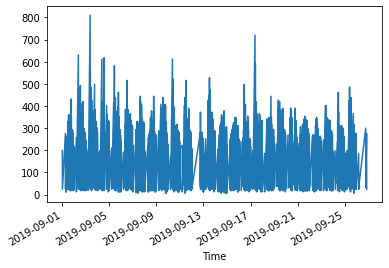

In [ ]:
date_time = pd.to_datetime(data.index)
#plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = data['Driving_time_s']
plot_features.index = date_time
_ = plot_features.plot()


In [ ]:
#check that this month data contains weekend?
#data.loc[(pd.to_datetime(data.index).month == month)& (data['dayofweek_6']== 1) ]

# LSTM model

In [ ]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: h5py, scipy, numpy, pyyaml
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [ ]:
#!pip install tf-nightly

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
from keras.layers import LeakyReLU
from keras.layers.normalization import BatchNormalization
keras.backend.clear_session()
from keras.optimizers import Adam, SGD, Nadam
!pip install livelossplot
from livelossplot import PlotLossesKeras
#from keras.experimental import CosineDecayRestarts

from keras.models import load_model

from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.constraints import min_max_norm

In [ ]:
#!pip install tf-nightly

In [ ]:
'''device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))'''

"device_name = tf.test.gpu_device_name()\nif device_name != '/device:GPU:0':\n  raise SystemError('GPU device not found')\nprint('Found GPU at: {}'.format(device_name))"

LSTM model



In [ ]:
num_features

25

In [ ]:
def LSTM_train(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val,
               X_test = X_test, y_test = y_test, look_back = look_back, num_features = num_features,
               n_layers = 2, n_neurons = 64, bs_double = 4):

    # to make this notebook's output stable across runs but it doesn't work with search logic.
    np.random.seed(42)
    tf.random.set_seed(42)

    bs = 2**bs_double
    bs_name = str(bs)

    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

    checkpoint1 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_"+path_end+bs_name+".hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    #checkpoint2 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_rmse_"+path_end+bs_name+".hdf5", monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='min')
    #checkpoint3 = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mae_"+path_end+bs_name+".hdf5", monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    
    #crate model
    model = keras.models.Sequential() 
    #model.add(BatchNormalization(name = 'batch_norm_0', batch_input_shape= (bs, look_back, num_features))) #
    #model.add(keras.layers.Bidirectional(keras.layers.LSTM(n_neurons, name = 'bidi_01', return_sequences = True)))
    #model.add(keras.layers.Bidirectional(keras.layers.LSTM(int(n_neurons/2), name = 'bidi_02', return_sequences = True)))

    #Hidden Layer 1
    
    model.add(keras.layers.LSTM(n_neurons, name = 'lstm_1', batch_input_shape= (bs, look_back, num_features), return_sequences=True, stateful=True, kernel_initializer='TruncatedNormal'))#, activation='relu'))
    model.add(LeakyReLU(name = 'leaky_relu_1'))
    model.add(keras.layers.Dropout(0.2, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        if i == n_layers:
            #model.add(keras.layers.Bidirectional(keras.layers.LSTM(n_neurons, name = 'lstm_{}'.format(i), return_sequences=False, stateful= False, kernel_initializer='TruncatedNormal', use_bias=False, activation='relu'))) #
            model.add(keras.layers.LSTM(n_neurons, name = 'lstm_{}'.format(i), return_sequences=False, stateful= True, kernel_initializer='TruncatedNormal', use_bias=False, activation='relu')) #
            model.add(keras.layers.Dropout(0.2, name = 'dropout_{}'.format(i)))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))
        else:
            #model.add(keras.layers.Bidirectional(keras.layers.LSTM(n_neurons, name = 'bidi_{}'.format(i), return_sequences = True)))
            model.add(keras.layers.LSTM(n_neurons, name = 'lstm_{}'.format(i), return_sequences=True, stateful=True, kernel_initializer='TruncatedNormal', use_bias=False)) #,
                            #name='h{}'.format(i)))#, activation='relu'))
            model.add(LeakyReLU(name = 'leaky_relu_{}'.format(i)))
            model.add(keras.layers.Dropout(0.2, name = 'dropout_{}'.format(i)))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))

    #Layer output
    model.add(keras.layers.Dense(1))
 
    '''
    #crate model
    model = keras.models.Sequential() 
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (look_back, num_features)))
    #Hidden Layer 1
    model.add(keras.layers.LSTM(n_neurons, name = 'lstm_1', return_sequences=True, kernel_initializer='TruncatedNormal'))#, activation='relu'))
    model.add(LeakyReLU())
    model.add(keras.layers.Dropout(0.01, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))

    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        if i == n_layers:
            model.add(keras.layers.LSTM(n_neurons, name = 'lstm_{}'.format(i), return_sequences=False, kernel_initializer='TruncatedNormal', use_bias=False, activation='relu'))
            model.add(keras.layers.Dropout(0.01, name = 'dropout_{}'.format(i)))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))
        else:
            model.add(keras.layers.LSTM(n_neurons*(2**i), name = 'lstm_{}'.format(i), return_sequences=True, kernel_initializer='TruncatedNormal', use_bias=False)) #,
                            #name='h{}'.format(i)))#, activation='relu'))
            model.add(LeakyReLU())
            model.add(keras.layers.Dropout(0.01, name = 'dropout_{}'.format(i)))
            model.add(BatchNormalization(name = 'batch_norm_{}'.format(i)))

    #Layer output
    model.add(keras.layers.Dense(1)) #,  kernel_constraint = NonNeg , activation='relu', kernel_constraint = min_max_norm(min_value=0.0, max_value=1.0 )
    '''
    #set learning rate and optimizer
    lr=1.e-3
    '''
    n_steps=2000
    global_step=1
    LR = keras.experimental.CosineDecayRestarts(
        initial_learning_rate=lr,
        first_decay_steps=n_steps,
        t_mul= 1.5,
        m_mul= 1,
        alpha=0.1,
        name=None
    )
    '''
    adam = Adam(learning_rate=lr) #, weight_decay=1e-5)


    model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

    model.fit(X_train, y_train, epochs=50, batch_size=bs, callbacks=[callback, checkpoint1], # checkpoint2, checkpoint3, PlotLossesKeras()
              validation_data=(X_val, y_val)) #, shuffle=False
    #model.reset_states
  
    # Load the architecture
    model = load_model("/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_"+path_end+bs_name+".hdf5")

    # Compile with the same settings as it has been saved with earlier
    #model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

    # Calculate the RMSE score as fitness score for GA
    rmse = model.evaluate(X_val, y_val)[1]
    #print('Validation RMSE: ', rmse,'\n')
    
    return rmse,

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 173 µs (started: 2021-01-25 22:37:48 +00:00)


# Using genetic algorithms to fine-tune hyperparameters in the model

time window size = look back

number of unit = nuerons in hidden layers

[code adapted from https://blog.coast.ai/lets-evolve-a-neural-network-with-a-genetic-algorithm-code-included-8809bece164]

In [ ]:
nn_param_choices = {
    'n_neurons': [16, 32, 64, 128], #, 512, 768, 1024
    'n_layers': [2, 3, 4], #
    'bs_double': [4, 5, 6, 7, 8, 9, 10], # , 4, 5, 6, 7, 8, 9, 10
    'n_timewindow' : [0.5, 1, 1.5, 2], #0.5, 1, 1.5, 2
    
}
network = {} #vector
count = 10 # Number of population in each generation.
generations = 5  # Number of times to produce the generation.
retain=0.4 # the of population that will keep from the current gen to next gen.
random_select=0.1 # randomly keep the abandon vectors by compare a random number with this value.
mutate_chance=0.2 # Randomly mutate the children that have a random number higher than this number.


time: 6.51 ms (started: 2021-01-25 22:37:48 +00:00)


In [ ]:
#create a random vector(network)
def create_rand(nn_param_choices):
  for key in nn_param_choices:
    network[key] = random.choice(nn_param_choices[key])
  return network

time: 1.54 ms (started: 2021-01-25 22:37:49 +00:00)


In [ ]:
#create population from the create_rand function as prerequisite size
def create_population(nn_param_choices, count):
  pop = []
  for _ in range(0, count):
      n = create_rand(nn_param_choices).copy()
      pop.append(n)
  return pop

time: 5.15 ms (started: 2021-01-25 22:37:49 +00:00)


In [ ]:
#train each vector in population to get fitness value
def train_networks(networks, data= data):
    pbar = tqdm(total=len(networks))
    accuracy = []
    for network in networks:
        print(network)
        print(network['n_neurons'])
        look_back = round(size_trip*network['n_timewindow'])
        X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_to_rnn_scaling(df=data, look_back=look_back, target_column='Driving_time_s')
        accuracy.append(LSTM_train(X_train, y_train, X_val, y_val, X_test, y_test , look_back , n_neurons= network['n_neurons'], n_layers= network['n_layers'], bs_double= network['bs_double']))
        pbar.update(1)
    pbar.close()
    return accuracy

time: 13.2 ms (started: 2021-01-25 22:37:49 +00:00)


In [ ]:
networks = create_population(nn_param_choices, count)
networks

[{'bs_double': 10, 'n_layers': 4, 'n_neurons': 32, 'n_timewindow': 2},
 {'bs_double': 5, 'n_layers': 4, 'n_neurons': 32, 'n_timewindow': 2},
 {'bs_double': 7, 'n_layers': 3, 'n_neurons': 32, 'n_timewindow': 1},
 {'bs_double': 8, 'n_layers': 4, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 7, 'n_layers': 3, 'n_neurons': 32, 'n_timewindow': 1.5},
 {'bs_double': 9, 'n_layers': 3, 'n_neurons': 64, 'n_timewindow': 2},
 {'bs_double': 6, 'n_layers': 3, 'n_neurons': 32, 'n_timewindow': 1},
 {'bs_double': 7, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 1.5},
 {'bs_double': 8, 'n_layers': 4, 'n_neurons': 64, 'n_timewindow': 1},
 {'bs_double': 4, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 1}]

time: 6.15 ms (started: 2021-01-25 22:37:59 +00:00)


In [ ]:
#networks[1]['n_timewindow']
#networks == [{'bs_double': 9, 'n_layers': 2, 'n_neurons': 128, 'n_timewindow': 0.5}]
#networks.index({'bs_double': 8, 'n_layers': 2, 'n_neurons': 128, 'n_timewindow': 0.5})
#{'bs_double': 9, 'n_layers': 2, 'n_neurons': 128, 'n_timewindow': 0.5} in networks
networks[:3]

[{'bs_double': 8, 'n_layers': 4, 'n_neurons': 64, 'n_timewindow': 2},
 {'bs_double': 8, 'n_layers': 4, 'n_neurons': 128, 'n_timewindow': 1.5},
 {'bs_double': 8, 'n_layers': 4, 'n_neurons': 128, 'n_timewindow': 0.5}]

time: 7.85 ms (started: 2021-01-14 16:33:46 +00:00)


In [ ]:
#offspring children by crossover then two new children are produced
def breed(mother, father, nn_param_choices = nn_param_choices, mutate_chance=0.2):
    children = []
    for _ in range(2):

        child = {}

        if _ == 1:
            for param in nn_param_choices:
                if children[0][param] == mother[param]:
                    child[param] = father[param]
                else:
                    child[param] = mother[param]
        else:
            # Loop through the parameters
            for param in nn_param_choices:
                child[param] = random.choice(
                    [mother[param], father[param]]
                )

        # Randomly mutate some of the children.
        if mutate_chance > random.random():
            network = mutate(child)

        children.append(child)

    return children

time: 9.14 ms (started: 2021-01-25 22:38:07 +00:00)


In [ ]:
#mutate some part of hyperparameter set
def mutate(child):
    # Choose a random parm.
    mutation = random.choice(list(nn_param_choices.keys()))

    # Mutate the random params.
    child[mutation] = random.choice(nn_param_choices[mutation])

    return child

time: 2.29 ms (started: 2021-01-25 22:38:10 +00:00)


In [ ]:
#evolve function to generate a new generation
def evolve(networks, parent_accuracy=[1,1,1,1], retain=retain, random_select=0.1, nn_param_choices = nn_param_choices, iteration = 1):
    
    # find the size of parents to retian in the next gen
    retain_length = int(len(networks)*retain)
    
    # Get scores for each network
    if iteration == 0: #train all networks to get score
        accuracy = train_networks(networks)
    else: #in other generation get score for remain parents from previous training
        accuracy_parent_last = parent_accuracy
        accuracy_child = train_networks(networks[retain_length:])
        accuracy = accuracy_parent_last + accuracy_child

    # ranking the scores
    sorted_network_accuracy = [x for _,x in sorted(zip(accuracy,networks), key=lambda pair: pair[0])]
    sorted_accuracy = sorted(accuracy)

    # The remain parents
    parents = sorted_network_accuracy[:retain_length]
    parents_acc = sorted_accuracy[:retain_length]

    # randomly keep some of unqualified vectors.
    for individual in sorted_network_accuracy[retain_length:]:
        if random_select > random.random():
            parents.append(individual)

    # find number of free spots
    parents_length = len(parents)
    desired_length = len(networks) - parents_length
    children = []

    # Add children to the free spaces
    while len(children) < desired_length:

        # random mother and father.
        male = random.randint(0, parents_length-1)
        female = random.randint(0, parents_length-1)

        # ensure that they are not the same vector
        if male != female:
            male = parents[male]
            female = parents[female]

            # Offspring
            babies = breed(male, female, nn_param_choices)

            # Add kid one by one to make sure it dose not exceed free spaces
            for baby in babies:
                if (len(children) < desired_length) & ~(baby in parents):
                    children.append(baby)

    parents.extend(children)
    #print(parents_acc)

    return parents, parents_acc

time: 32.9 ms (started: 2021-01-25 22:38:15 +00:00)


In [ ]:
#function to run the genetic algorithm
def generate(generations, count, nn_param_choices, networks):
    #networks = create_population(nn_param_choices, count) #if want to initial networks here
    networks = networks
    #dummy parent_acc for the first iteration
    parent_acc = list(range(int(len(networks)*retain)))
    print(networks)
    #run iterations
    for i in range(generations-1):
        print('Iteration: ', i+1)
        #print(networks)
        networks, parent_acc = evolve(networks, parent_accuracy= parent_acc, iteration = i)
        print(networks)
    
    #get the score
    print('Iteration: ', i+2)
    score = train_networks(networks)

    #ranking
    sorted_network_score = [x for _,x in sorted(zip(score,networks), key=lambda pair: pair[0])]
    sorted_score = sorted(score)
    return sorted_network_score,sorted_score

time: 17.2 ms (started: 2021-01-25 22:38:18 +00:00)


In [ ]:
#for 201 that exeed the maximum running time
#networks = [{'n_neurons': 32, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}]
#[{'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5},{'n_neurons': 64, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 0.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 0.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 0.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 0.5}] iter 3
#networks
#for 202 that exeed the maximum running time
networks = [{'n_neurons': 64, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 128, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}]


networks

[{'bs_double': 5, 'n_layers': 2, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 5, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 2},
 {'bs_double': 5, 'n_layers': 2, 'n_neurons': 128, 'n_timewindow': 2},
 {'bs_double': 6, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 1.5},
 {'bs_double': 5, 'n_layers': 4, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 6, 'n_layers': 2, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 6, 'n_layers': 2, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 5, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 2},
 {'bs_double': 6, 'n_layers': 4, 'n_neurons': 64, 'n_timewindow': 1.5},
 {'bs_double': 5, 'n_layers': 4, 'n_neurons': 16, 'n_timewindow': 1.5}]

time: 17.4 ms (started: 2021-01-25 22:38:21 +00:00)


In [ ]:
ga_network, rmse = generate(generations, count, nn_param_choices, networks)

  0%|          | 0/10 [00:00<?, ?it/s]

[{'n_neurons': 64, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 128, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}]
Iteration:  1
{'n_neurons': 64, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}
64
Epoch 1/50
208/208 [==============================] - 10s 30ms/step - loss: 0.3110 - root_mean_squared_error: 0.5303 - mae: 0.3778 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218 - val_mae: 0.1101



 10%|█         | 1/10 [01:20<12:04, 80.50s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}
16
Epoch 1/50
208/208 [==============================] - 8s 25ms/step - loss: 0.3829 - root_mean_squared_error: 0.5631 - mae: 0.3789 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085 - val_mae: 0.0693

Epoch 00001: val_loss improved from inf to 0.01177, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 5s 22ms/step - loss: 0.0382 - root_mean_squared_error: 0.1952 - mae: 0.1316 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1268 - val_mae: 0.0930

Epoch 00002: val_loss did not improve from 0.01177
Epoch 3/50
208/208 [==============================] - 5s 24ms/step - loss: 0.0272 - root_mean_squared_error: 0.1647 - mae: 0.1064 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127 - val_mae: 0.0859

Epoch 00003: val_loss did not improve from 0.01177
Epoch 4/50
208/208 [=========================

 20%|██        | 2/10 [03:51<13:33, 101.74s/it]

{'n_neurons': 128, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}
128
Epoch 1/50
208/208 [==============================] - 17s 65ms/step - loss: 0.4277 - root_mean_squared_error: 0.6212 - mae: 0.4450 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1380 - val_mae: 0.1027

Epoch 00001: val_loss improved from inf to 0.01905, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 13s 62ms/step - loss: 0.0489 - root_mean_squared_error: 0.2210 - mae: 0.1643 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964 - val_mae: 0.0713

Epoch 00002: val_loss improved from 0.01905 to 0.00930, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 13s 62ms/step - loss: 0.0339 - root_mean_squared_error: 0.1841 - mae: 0.1352 - val_loss: 0.0139 - val_root_mean_squared_error: 

 30%|███       | 3/10 [07:20<15:36, 133.73s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 1.5}
16
Epoch 1/50
104/104 [==============================] - 9s 42ms/step - loss: 0.3031 - root_mean_squared_error: 0.5118 - mae: 0.3373 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382 - val_mae: 0.1286

Epoch 00001: val_loss improved from inf to 0.01910, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 4s 35ms/step - loss: 0.0663 - root_mean_squared_error: 0.2573 - mae: 0.1580 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1804 - val_mae: 0.1685

Epoch 00002: val_loss did not improve from 0.01910
Epoch 3/50
104/104 [==============================] - 4s 34ms/step - loss: 0.0374 - root_mean_squared_error: 0.1934 - mae: 0.1216 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1942 - val_mae: 0.1805

Epoch 00003: val_loss did not improve from 0.01910
Epoch 4/50
104/104 [=======================

 40%|████      | 4/10 [09:44<13:40, 136.76s/it]

{'n_neurons': 64, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}
64
Epoch 1/50
208/208 [==============================] - 92s 417ms/step - loss: 0.4867 - root_mean_squared_error: 0.6507 - mae: 0.4502 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2982 - val_mae: 0.2820

Epoch 00001: val_loss improved from inf to 0.08892, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 87s 419ms/step - loss: 0.0812 - root_mean_squared_error: 0.2844 - mae: 0.1900 - val_loss: 0.2733 - val_root_mean_squared_error: 0.5228 - val_mae: 0.3912

Epoch 00002: val_loss did not improve from 0.08892
Epoch 3/50
208/208 [==============================] - 87s 417ms/step - loss: 0.0441 - root_mean_squared_error: 0.2095 - mae: 0.1443 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1915 - val_mae: 0.1660

Epoch 00003: val_loss improved from 0.08892 to 0.03669, saving model to /content/drive/M

 50%|█████     | 5/10 [49:12<1:07:11, 806.27s/it]

{'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}
64
Epoch 1/50
104/104 [==============================] - 7s 38ms/step - loss: 0.3680 - root_mean_squared_error: 0.5731 - mae: 0.4102 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033 - val_mae: 0.0876

Epoch 00001: val_loss improved from inf to 0.01068, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 4s 36ms/step - loss: 0.0451 - root_mean_squared_error: 0.2124 - mae: 0.1490 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020 - val_mae: 0.0851

Epoch 00002: val_loss improved from 0.01068 to 0.01041, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 3/50
104/104 [==============================] - 3s 32ms/step - loss: 0.0373 - root_mean_squared_error: 0.1930 - mae: 0.1300 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0

 60%|██████    | 6/10 [50:45<39:29, 592.45s/it]  

{'n_neurons': 64, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 1.5}
64
Epoch 1/50
104/104 [==============================] - 7s 38ms/step - loss: 0.3680 - root_mean_squared_error: 0.5731 - mae: 0.4102 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033 - val_mae: 0.0876

Epoch 00001: val_loss improved from inf to 0.01068, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 4s 35ms/step - loss: 0.0451 - root_mean_squared_error: 0.2124 - mae: 0.1490 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020 - val_mae: 0.0851

Epoch 00002: val_loss improved from 0.01068 to 0.01041, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 3/50
104/104 [==============================] - 3s 32ms/step - loss: 0.0373 - root_mean_squared_error: 0.1930 - mae: 0.1300 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0

 70%|███████   | 7/10 [52:18<22:07, 442.40s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}
16
Epoch 1/50
208/208 [==============================] - 13s 42ms/step - loss: 0.2363 - root_mean_squared_error: 0.4626 - mae: 0.3199 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510 - val_mae: 0.1409

Epoch 00001: val_loss improved from inf to 0.02281, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 8s 36ms/step - loss: 0.0460 - root_mean_squared_error: 0.2141 - mae: 0.1371 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397 - val_mae: 0.1212

Epoch 00002: val_loss improved from 0.02281 to 0.01951, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 8s 36ms/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - mae: 0.1126 - val_loss: 0.0101 - val_root_mean_squared_error: 0.10

 80%|████████  | 8/10 [56:16<12:42, 381.05s/it]

{'n_neurons': 64, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}
64
Epoch 1/50
104/104 [==============================] - 61s 529ms/step - loss: 0.5546 - root_mean_squared_error: 0.6964 - mae: 0.4631 - val_loss: 0.1438 - val_root_mean_squared_error: 0.3793 - val_mae: 0.3667

Epoch 00001: val_loss improved from inf to 0.14383, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 54s 515ms/step - loss: 0.0713 - root_mean_squared_error: 0.2666 - mae: 0.1819 - val_loss: 0.0987 - val_root_mean_squared_error: 0.3142 - val_mae: 0.2989

Epoch 00002: val_loss improved from 0.14383 to 0.09874, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 3/50
104/104 [==============================] - 54s 522ms/step - loss: 0.0433 - root_mean_squared_error: 0.2079 - mae: 0.1391 - val_loss: 0.0447 - val_root_mean_squared_erro

 90%|█████████ | 9/10 [1:18:29<11:06, 666.75s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 17s 54ms/step - loss: 0.1959 - root_mean_squared_error: 0.4223 - mae: 0.2786 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354 - val_mae: 0.1259

Epoch 00001: val_loss improved from inf to 0.01833, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 10s 50ms/step - loss: 0.0366 - root_mean_squared_error: 0.1908 - mae: 0.1231 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038 - val_mae: 0.0879

Epoch 00002: val_loss improved from 0.01833 to 0.01078, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 10s 49ms/step - loss: 0.0366 - root_mean_squared_error: 0.1910 - mae: 0.1135 - val_loss: 0.0122 - val_root_mean_squared_error: 

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 64, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 9, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 0.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}]
Iteration:  2
{'n_neurons': 64, 'n_layers': 4, 'bs_double': 5, 'n_timewindow': 1.5}
64
Epoch 1/50
208/208 [==============================] - 87s 394ms/step - loss: 0.4867 - root_mean_squared_error: 0.6507 - mae: 0.4502 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2982 - val_mae: 0.2820

Ep

 17%|█▋        | 1/6 [37:33<3:07:48, 2253.61s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 9, 'n_timewindow': 2}
16
Epoch 1/50
13/13 [==============================] - 8s 242ms/step - loss: 0.7107 - root_mean_squared_error: 0.8167 - mae: 0.5652 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1031 - val_mae: 0.0655

Epoch 00001: val_loss improved from inf to 0.01063, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 2/50
13/13 [==============================] - 2s 179ms/step - loss: 0.0822 - root_mean_squared_error: 0.2864 - mae: 0.1992 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014 - val_mae: 0.0840

Epoch 00002: val_loss improved from 0.01063 to 0.01028, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 3/50
13/13 [==============================] - 2s 179ms/step - loss: 0.0530 - root_mean_squared_error: 0.2301 - mae: 0.1539 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118

 33%|███▎      | 2/6 [38:02<1:45:44, 1586.15s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}
16
Epoch 1/50
104/104 [==============================] - 10s 54ms/step - loss: 0.2921 - root_mean_squared_error: 0.5076 - mae: 0.3355 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365 - val_mae: 0.1270

Epoch 00001: val_loss improved from inf to 0.01864, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 5s 44ms/step - loss: 0.0546 - root_mean_squared_error: 0.2332 - mae: 0.1444 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1478 - val_mae: 0.1379

Epoch 00002: val_loss did not improve from 0.01864
Epoch 3/50
104/104 [==============================] - 5s 44ms/step - loss: 0.0382 - root_mean_squared_error: 0.1949 - mae: 0.1193 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1714 - val_mae: 0.1595

Epoch 00003: val_loss did not improve from 0.01864
Epoch 4/50
104/104 [========================

 50%|█████     | 3/6 [42:05<59:09, 1183.19s/it]  

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 0.5}
16
Epoch 1/50
105/105 [==============================] - 7s 22ms/step - loss: 0.2840 - root_mean_squared_error: 0.5005 - mae: 0.3354 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1160 - val_mae: 0.1048

Epoch 00001: val_loss improved from inf to 0.01345, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
105/105 [==============================] - 2s 16ms/step - loss: 0.0425 - root_mean_squared_error: 0.2058 - mae: 0.1280 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1409 - val_mae: 0.1313

Epoch 00002: val_loss did not improve from 0.01345
Epoch 3/50
105/105 [==============================] - 2s 15ms/step - loss: 0.0328 - root_mean_squared_error: 0.1806 - mae: 0.1118 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571 - val_mae: 0.1465

Epoch 00003: val_loss did not improve from 0.01345
Epoch 4/50
105/105 [=======================

 67%|██████▋   | 4/6 [42:52<28:04, 842.25s/it] 

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 11s 30ms/step - loss: 0.2500 - root_mean_squared_error: 0.4652 - mae: 0.3127 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - val_mae: 0.1753

Epoch 00001: val_loss improved from inf to 0.03521, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 6s 28ms/step - loss: 0.0461 - root_mean_squared_error: 0.2145 - mae: 0.1330 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534 - val_mae: 0.1392

Epoch 00002: val_loss improved from 0.03521 to 0.02354, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 6s 27ms/step - loss: 0.0376 - root_mean_squared_error: 0.1934 - mae: 0.1146 - val_loss: 0.0111 - val_root_mean_squared_error: 0.

 83%|████████▎ | 5/6 [45:55<10:44, 644.47s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 7s 20ms/step - loss: 0.3483 - root_mean_squared_error: 0.5415 - mae: 0.3699 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156 - val_mae: 0.0747

Epoch 00001: val_loss improved from inf to 0.01335, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 3s 16ms/step - loss: 0.0395 - root_mean_squared_error: 0.1987 - mae: 0.1352 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462 - val_mae: 0.1116

Epoch 00002: val_loss did not improve from 0.01335
Epoch 3/50
208/208 [==============================] - 3s 17ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - mae: 0.1076 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - val_mae: 0.0857

Epoch 00003: val_loss improved from 0.01335 to 0.01224, saving model to /content/drive/My Driv

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 8, 'n_timewindow': 2}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 32, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}]
Iteration:  3
{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 11s 31ms/step - loss: 0.2500 - root_mean_squared_error: 0.4652 - mae: 0.3127 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - val_mae: 0.1753

Epoch 000

 17%|█▋        | 1/6 [03:04<15:23, 184.78s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 8, 'n_timewindow': 2}
16
Epoch 1/50
26/26 [==============================] - 8s 135ms/step - loss: 0.5113 - root_mean_squared_error: 0.6833 - mae: 0.4632 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009 - val_mae: 0.0831

Epoch 00001: val_loss improved from inf to 0.01018, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101256.hdf5
Epoch 2/50
26/26 [==============================] - 3s 104ms/step - loss: 0.0517 - root_mean_squared_error: 0.2273 - mae: 0.1530 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118 - val_mae: 0.0995

Epoch 00002: val_loss did not improve from 0.01018
Epoch 3/50
26/26 [==============================] - 3s 103ms/step - loss: 0.0524 - root_mean_squared_error: 0.2288 - mae: 0.1391 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183 - val_mae: 0.1075

Epoch 00003: val_loss did not improve from 0.01018
Epoch 4/50
26/26 [=============================

 33%|███▎      | 2/6 [03:30<09:08, 137.20s/it]

{'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}
64
Epoch 1/50
208/208 [==============================] - 30s 126ms/step - loss: 0.3984 - root_mean_squared_error: 0.6055 - mae: 0.4360 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005 - val_mae: 0.0663

Epoch 00001: val_loss improved from inf to 0.01011, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 25s 122ms/step - loss: 0.0466 - root_mean_squared_error: 0.2157 - mae: 0.1475 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1202 - val_mae: 0.0891

Epoch 00002: val_loss did not improve from 0.01011
Epoch 3/50
208/208 [==============================] - 25s 122ms/step - loss: 0.0342 - root_mean_squared_error: 0.1848 - mae: 0.1246 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679 - val_mae: 0.1246

Epoch 00003: val_loss did not improve from 0.01011
Epoch 4/50
208/208 [===================

 50%|█████     | 3/6 [09:18<10:00, 200.33s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 2}
16
Epoch 1/50
104/104 [==============================] - 6s 28ms/step - loss: 0.5187 - root_mean_squared_error: 0.6640 - mae: 0.4566 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999 - val_mae: 0.0658

Epoch 00001: val_loss improved from inf to 0.00998, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 3s 26ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014 - mae: 0.1394 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133 - val_mae: 0.0726

Epoch 00002: val_loss did not improve from 0.00998
Epoch 3/50
104/104 [==============================] - 2s 23ms/step - loss: 0.0337 - root_mean_squared_error: 0.1833 - mae: 0.1160 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1168 - val_mae: 0.0799

Epoch 00003: val_loss did not improve from 0.00998
Epoch 4/50
104/104 [=========================

 67%|██████▋   | 4/6 [09:40<04:53, 146.92s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 11s 31ms/step - loss: 0.2500 - root_mean_squared_error: 0.4652 - mae: 0.3127 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - val_mae: 0.1753

Epoch 00001: val_loss improved from inf to 0.03521, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 6s 27ms/step - loss: 0.0461 - root_mean_squared_error: 0.2145 - mae: 0.1330 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534 - val_mae: 0.1392

Epoch 00002: val_loss improved from 0.03521 to 0.02354, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 6s 27ms/step - loss: 0.0376 - root_mean_squared_error: 0.1934 - mae: 0.1146 - val_loss: 0.0111 - val_root_mean_squared_error: 0.

 83%|████████▎ | 5/6 [12:41<02:37, 157.09s/it]

{'n_neurons': 32, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}
32
Epoch 1/50
104/104 [==============================] - 13s 88ms/step - loss: 0.3301 - root_mean_squared_error: 0.5399 - mae: 0.3572 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051 - val_mae: 0.0900

Epoch 00001: val_loss improved from inf to 0.01104, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 8s 78ms/step - loss: 0.0395 - root_mean_squared_error: 0.1985 - mae: 0.1278 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010 - val_mae: 0.0830

Epoch 00002: val_loss improved from 0.01104 to 0.01019, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 3/50
104/104 [==============================] - 8s 77ms/step - loss: 0.0376 - root_mean_squared_error: 0.1938 - mae: 0.1209 - val_loss: 0.0106 - val_root_mean_squared_error: 0.10

  0%|          | 0/6 [00:00<?, ?it/s]

[{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 9, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 128, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}]
Iteration:  4
{'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}
64
Epoch 1/50
208/208 [==============================] - 31s 129ms/step - loss: 0.3984 - root_mean_squared_error: 0.6055 - mae: 0.4360 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005 - val_mae: 0.0663

Epoch 0

 17%|█▋        | 1/6 [05:58<29:50, 358.06s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 9, 'n_timewindow': 2}
16
Epoch 1/50
13/13 [==============================] - 5s 151ms/step - loss: 1.4694 - root_mean_squared_error: 1.1886 - mae: 0.9511 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092 - val_mae: 0.0682

Epoch 00001: val_loss improved from inf to 0.01193, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 2/50
13/13 [==============================] - 1s 68ms/step - loss: 0.1897 - root_mean_squared_error: 0.4343 - mae: 0.3174 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969 - val_mae: 0.0692

Epoch 00002: val_loss improved from 0.01193 to 0.00940, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 3/50
13/13 [==============================] - 1s 67ms/step - loss: 0.0770 - root_mean_squared_error: 0.2775 - mae: 0.2106 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970 -

 33%|███▎      | 2/6 [06:10<16:57, 254.33s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 11s 32ms/step - loss: 0.2500 - root_mean_squared_error: 0.4652 - mae: 0.3127 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - val_mae: 0.1753

Epoch 00001: val_loss improved from inf to 0.03521, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 6s 29ms/step - loss: 0.0461 - root_mean_squared_error: 0.2145 - mae: 0.1330 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534 - val_mae: 0.1392

Epoch 00002: val_loss improved from 0.03521 to 0.02354, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 6s 29ms/step - loss: 0.0376 - root_mean_squared_error: 0.1934 - mae: 0.1146 - val_loss: 0.0111 - val_root_mean_squared_error: 0.

 50%|█████     | 3/6 [09:25<11:49, 236.60s/it]

{'n_neurons': 128, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}
128
Epoch 1/50
104/104 [==============================] - 67s 605ms/step - loss: 0.8600 - root_mean_squared_error: 0.8920 - mae: 0.6063 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1193 - val_mae: 0.1086

Epoch 00001: val_loss improved from inf to 0.01423, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 62s 599ms/step - loss: 0.3279 - root_mean_squared_error: 0.5688 - mae: 0.4029 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2629 - val_mae: 0.2110

Epoch 00002: val_loss did not improve from 0.01423
Epoch 3/50
104/104 [==============================] - 62s 592ms/step - loss: 0.2011 - root_mean_squared_error: 0.4478 - mae: 0.3125 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1473 - val_mae: 0.1197

Epoch 00003: val_loss did not improve from 0.01423
Epoch 4/50
104/104 [=================

 67%|██████▋   | 4/6 [15:54<09:24, 282.32s/it]

{'n_neurons': 64, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
64
Epoch 1/50
208/208 [==============================] - 25s 99ms/step - loss: 0.3890 - root_mean_squared_error: 0.5932 - mae: 0.4205 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992 - val_mae: 0.0655

Epoch 00001: val_loss improved from inf to 0.00983, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 20s 96ms/step - loss: 0.0505 - root_mean_squared_error: 0.2242 - mae: 0.1526 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076 - val_mae: 0.0770

Epoch 00002: val_loss did not improve from 0.00983
Epoch 3/50
208/208 [==============================] - 20s 96ms/step - loss: 0.0341 - root_mean_squared_error: 0.1846 - mae: 0.1218 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1366 - val_mae: 0.0946

Epoch 00003: val_loss did not improve from 0.00983
Epoch 4/50
208/208 [====================

 83%|████████▎ | 5/6 [20:47<04:45, 285.52s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 11s 31ms/step - loss: 0.2500 - root_mean_squared_error: 0.4652 - mae: 0.3127 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - val_mae: 0.1753

Epoch 00001: val_loss improved from inf to 0.03521, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 6s 28ms/step - loss: 0.0461 - root_mean_squared_error: 0.2145 - mae: 0.1330 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534 - val_mae: 0.1392

Epoch 00002: val_loss improved from 0.03521 to 0.02354, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 6s 28ms/step - loss: 0.0376 - root_mean_squared_error: 0.1934 - mae: 0.1146 - val_loss: 0.0111 - val_root_mean_squared_error: 0.

  0%|          | 0/10 [00:00<?, ?it/s]

[{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 3, 'bs_double': 7, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 7, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 9, 'n_timewindow': 2}, {'n_neurons': 128, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}, {'n_neurons': 16, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 2}]
Iteration:  5
{'n_neurons': 16, 'n_layers': 3, 'bs_double': 6, 'n_timewindow': 2}
16
Epoch 1/50
104/104 [==============================] - 10s 52ms/step - loss: 0.2921 - root_mean_squared_error: 0.5076 - mae: 0.3355 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365 - val_mae: 0.1270

Epoch 00001:

 10%|█         | 1/10 [04:04<36:37, 244.17s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 1.5}
16
Epoch 1/50
208/208 [==============================] - 7s 19ms/step - loss: 0.3483 - root_mean_squared_error: 0.5415 - mae: 0.3699 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156 - val_mae: 0.0747

Epoch 00001: val_loss improved from inf to 0.01335, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 4s 17ms/step - loss: 0.0395 - root_mean_squared_error: 0.1987 - mae: 0.1352 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462 - val_mae: 0.1116

Epoch 00002: val_loss did not improve from 0.01335
Epoch 3/50
208/208 [==============================] - 4s 17ms/step - loss: 0.0272 - root_mean_squared_error: 0.1649 - mae: 0.1076 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - val_mae: 0.0857

Epoch 00003: val_loss improved from 0.01335 to 0.01224, saving model to /content/drive/My Driv

 20%|██        | 2/10 [05:53<27:09, 203.65s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}
16
Epoch 1/50
208/208 [==============================] - 8s 24ms/step - loss: 0.3829 - root_mean_squared_error: 0.5631 - mae: 0.3789 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085 - val_mae: 0.0693

Epoch 00001: val_loss improved from inf to 0.01177, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 5s 22ms/step - loss: 0.0382 - root_mean_squared_error: 0.1952 - mae: 0.1316 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1268 - val_mae: 0.0930

Epoch 00002: val_loss did not improve from 0.01177
Epoch 3/50
208/208 [==============================] - 5s 22ms/step - loss: 0.0272 - root_mean_squared_error: 0.1647 - mae: 0.1064 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127 - val_mae: 0.0859

Epoch 00003: val_loss did not improve from 0.01177
Epoch 4/50
208/208 [=========================

 30%|███       | 3/10 [08:14<21:33, 184.79s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 5, 'n_timewindow': 2}
16
Epoch 1/50
208/208 [==============================] - 12s 40ms/step - loss: 0.2363 - root_mean_squared_error: 0.4626 - mae: 0.3199 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510 - val_mae: 0.1409

Epoch 00001: val_loss improved from inf to 0.02281, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 8s 39ms/step - loss: 0.0460 - root_mean_squared_error: 0.2141 - mae: 0.1371 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1397 - val_mae: 0.1212

Epoch 00002: val_loss improved from 0.02281 to 0.01951, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 8s 37ms/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - mae: 0.1126 - val_loss: 0.0101 - val_root_mean_squared_error: 0.10

 40%|████      | 4/10 [12:11<20:03, 200.52s/it]

{'n_neurons': 16, 'n_layers': 3, 'bs_double': 7, 'n_timewindow': 2}
16
Epoch 1/50
52/52 [==============================] - 8s 76ms/step - loss: 0.3731 - root_mean_squared_error: 0.5766 - mae: 0.3853 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141 - val_mae: 0.1025

Epoch 00001: val_loss improved from inf to 0.01303, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101128.hdf5
Epoch 2/50
52/52 [==============================] - 3s 64ms/step - loss: 0.0460 - root_mean_squared_error: 0.2145 - mae: 0.1392 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1309 - val_mae: 0.1212

Epoch 00002: val_loss did not improve from 0.01303
Epoch 3/50
52/52 [==============================] - 3s 61ms/step - loss: 0.0490 - root_mean_squared_error: 0.2209 - mae: 0.1278 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1444 - val_mae: 0.1347

Epoch 00003: val_loss did not improve from 0.01303
Epoch 4/50
52/52 [==============================] 

 50%|█████     | 5/10 [12:40<12:25, 149.06s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 7, 'n_timewindow': 2}
16
Epoch 1/50
52/52 [==============================] - 6s 42ms/step - loss: 0.7356 - root_mean_squared_error: 0.8091 - mae: 0.5872 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971 - val_mae: 0.0684

Epoch 00001: val_loss improved from inf to 0.00944, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101128.hdf5
Epoch 2/50
52/52 [==============================] - 2s 29ms/step - loss: 0.0503 - root_mean_squared_error: 0.2238 - mae: 0.1540 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009 - val_mae: 0.0655

Epoch 00002: val_loss did not improve from 0.00944
Epoch 3/50
52/52 [==============================] - 1s 29ms/step - loss: 0.0361 - root_mean_squared_error: 0.1900 - mae: 0.1228 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030 - val_mae: 0.0659

Epoch 00003: val_loss did not improve from 0.00944
Epoch 4/50
52/52 [==============================] 

 60%|██████    | 6/10 [12:56<07:16, 109.14s/it]

{'n_neurons': 16, 'n_layers': 4, 'bs_double': 6, 'n_timewindow': 1.5}
16
Epoch 1/50
104/104 [==============================] - 14s 82ms/step - loss: 0.2424 - root_mean_squared_error: 0.4698 - mae: 0.3055 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076 - val_mae: 0.0940

Epoch 00001: val_loss improved from inf to 0.01159, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 8s 75ms/step - loss: 0.0370 - root_mean_squared_error: 0.1922 - mae: 0.1258 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1205 - val_mae: 0.1101

Epoch 00002: val_loss did not improve from 0.01159
Epoch 3/50
104/104 [==============================] - 8s 73ms/step - loss: 0.0414 - root_mean_squared_error: 0.2033 - mae: 0.1247 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112 - val_mae: 0.0987

Epoch 00003: val_loss did not improve from 0.01159
Epoch 4/50
104/104 [======================

 70%|███████   | 7/10 [19:58<10:08, 203.00s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 9, 'n_timewindow': 2}
16
Epoch 1/50
13/13 [==============================] - 4s 116ms/step - loss: 1.4694 - root_mean_squared_error: 1.1886 - mae: 0.9511 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092 - val_mae: 0.0682

Epoch 00001: val_loss improved from inf to 0.01193, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 2/50
13/13 [==============================] - 1s 92ms/step - loss: 0.1897 - root_mean_squared_error: 0.4343 - mae: 0.3174 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969 - val_mae: 0.0692

Epoch 00002: val_loss improved from 0.01193 to 0.00940, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data101512.hdf5
Epoch 3/50
13/13 [==============================] - 1s 65ms/step - loss: 0.0770 - root_mean_squared_error: 0.2775 - mae: 0.2106 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970 -

 80%|████████  | 8/10 [20:10<04:51, 145.84s/it]

{'n_neurons': 128, 'n_layers': 2, 'bs_double': 5, 'n_timewindow': 2}
128
Epoch 1/50
208/208 [==============================] - 16s 63ms/step - loss: 0.4277 - root_mean_squared_error: 0.6212 - mae: 0.4450 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1380 - val_mae: 0.1027

Epoch 00001: val_loss improved from inf to 0.01905, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 2/50
208/208 [==============================] - 12s 60ms/step - loss: 0.0489 - root_mean_squared_error: 0.2210 - mae: 0.1643 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964 - val_mae: 0.0713

Epoch 00002: val_loss improved from 0.01905 to 0.00930, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10132.hdf5
Epoch 3/50
208/208 [==============================] - 12s 59ms/step - loss: 0.0339 - root_mean_squared_error: 0.1841 - mae: 0.1352 - val_loss: 0.0139 - val_root_mean_squared_error: 

 90%|█████████ | 9/10 [23:23<02:39, 159.81s/it]

{'n_neurons': 16, 'n_layers': 2, 'bs_double': 6, 'n_timewindow': 2}
16
Epoch 1/50
104/104 [==============================] - 6s 32ms/step - loss: 0.5187 - root_mean_squared_error: 0.6640 - mae: 0.4566 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999 - val_mae: 0.0658

Epoch 00001: val_loss improved from inf to 0.00998, saving model to /content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10164.hdf5
Epoch 2/50
104/104 [==============================] - 2s 23ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014 - mae: 0.1394 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133 - val_mae: 0.0726

Epoch 00002: val_loss did not improve from 0.00998
Epoch 3/50
104/104 [==============================] - 2s 24ms/step - loss: 0.0337 - root_mean_squared_error: 0.1833 - mae: 0.1160 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1168 - val_mae: 0.0799

Epoch 00003: val_loss did not improve from 0.00998
Epoch 4/50
104/104 [=========================

100%|██████████| 10/10 [23:44<00:00, 142.46s/it]

time: 3h 15min 13s (started: 2021-01-25 22:38:27 +00:00)


In [ ]:
rmse, ga_network

([(0.042826101183891296,),
  (0.04340127110481262,),
  (0.04405916854739189,),
  (0.044567640870809555,),
  (0.04457038640975952,),
  (0.052936770021915436,),
  (0.09692955762147903,),
  (0.09713941067457199,),
  (0.09989364445209503,),
  (0.11413893848657608,)],
 [{'bs_double': 6, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 5, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 1.5},
  {'bs_double': 5, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 6, 'n_layers': 4, 'n_neurons': 16, 'n_timewindow': 1.5},
  {'bs_double': 5, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 5, 'n_layers': 2, 'n_neurons': 128, 'n_timewindow': 2},
  {'bs_double': 9, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 7, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 6, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 2},
  {'bs_double': 7, 'n_layers': 3, 'n_neurons': 16, 'n_timewindow': 2}])

time: 6.58 ms (started: 2021-01-26 01:53:40 +00:00)


In [ ]:
#assign the first order as the best model
best_model = ga_network[0]
best_model

{'bs_double': 4, 'n_layers': 2, 'n_neurons': 32, 'n_timewindow': 0.5}

time: 5.71 ms (started: 2021-01-14 16:27:25 +00:00)


In [ ]:
#best_model ={'bs_double': 4, 'n_layers': 2, 'n_neurons': 32, 'n_timewindow': 0.5}#{'bs_double': 0, 'n_layers': 2, 'n_neurons': 16, 'n_timewindow': 1}
best_model

{'bs_double': 4, 'n_layers': 2, 'n_neurons': 32, 'n_timewindow': 0.5}

time: 7.43 ms (started: 2021-01-15 17:38:02 +00:00)


In [ ]:
best_model['n_timewindow']

0.5

time: 3.37 ms (started: 2021-01-15 17:38:04 +00:00)


In [ ]:
bs = 2**best_model['bs_double']
bs_name = str(bs)

time: 1.26 ms (started: 2021-01-15 17:38:05 +00:00)


In [ ]:
look_back = int(np.ceil(size_trip*best_model['n_timewindow']))
X_train, y_train, X_val, y_val, X_test, y_test, split_index_test, scaler = df_to_rnn_scaling(df=data, look_back=look_back, target_column='Driving_time_s')

time: 37.7 ms (started: 2021-01-15 17:38:08 +00:00)


In [ ]:
print('X_train_shape: ', X_train.shape,' ', 'X_val_shape: ', X_val.shape,' ', 'X_test_shape: ', X_test.shape)
print('y_train_shape: ', y_train.shape,' ', 'y_val_shape: ', y_val.shape,' ', 'y_test_shape: ', y_test.shape)
print(look_back, num_features)

X_train_shape:  (4724, 5, 23)   X_val_shape:  (1516, 5, 23)   X_test_shape:  (436, 5, 23)
y_train_shape:  (4724,)   y_val_shape:  (1516,)   y_test_shape:  (436,)
5 23
time: 3.28 ms (started: 2021-01-15 17:38:10 +00:00)


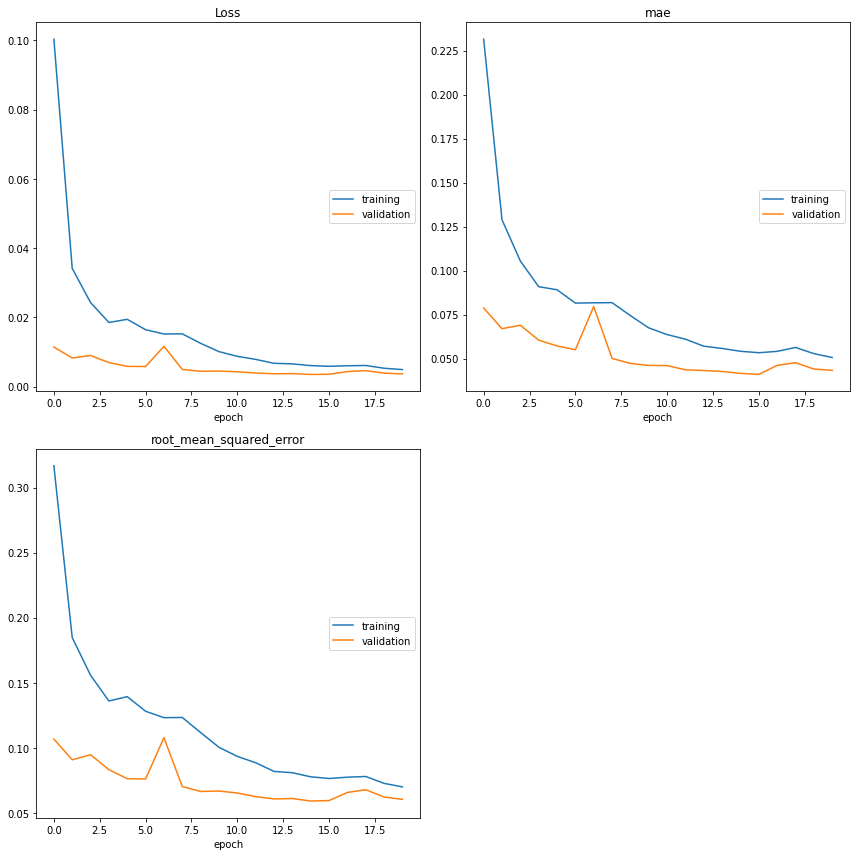

Loss
	training         	 (min:    0.005, max:    0.100, cur:    0.005)
	validation       	 (min:    0.003, max:    0.012, cur:    0.004)
mae
	training         	 (min:    0.051, max:    0.231, cur:    0.051)
	validation       	 (min:    0.041, max:    0.080, cur:    0.043)
root_mean_squared_error
	training         	 (min:    0.070, max:    0.317, cur:    0.070)
	validation       	 (min:    0.059, max:    0.108, cur:    0.060)
14/14 [==============================] - 1s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - mae: 0.0417


(0.059139613062143326,)

time: 1min 7s (started: 2021-01-15 17:38:11 +00:00)


In [ ]:
LSTM_train(X_train, y_train, X_test, y_test,X_test,y_test,n_neurons= best_model['n_neurons'], n_layers= best_model['n_layers'], bs_double= best_model['bs_double'], look_back=look_back)

# Cross validate on the test set

In [ ]:
'''
#set learning rate and optimizer
lr=1.e-3
n_steps=2000
global_step=1
LR = keras.experimental.CosineDecayRestarts(
    initial_learning_rate=lr,
    first_decay_steps=n_steps,
    t_mul= 1.5,
    m_mul= 1,
    alpha=0.1,
    name=None
)
adam = Adam(learning_rate=LR) #, weight_decay=1e-5)
'''

'\n#set learning rate and optimizer\nlr=1.e-3\nn_steps=2000\nglobal_step=1\nLR = keras.experimental.CosineDecayRestarts(\n    initial_learning_rate=lr,\n    first_decay_steps=n_steps,\n    t_mul= 1.5,\n    m_mul= 1,\n    alpha=0.1,\n    name=None\n)\nadam = Adam(learning_rate=LR) #, weight_decay=1e-5)\n'

time: 7.91 ms (started: 2021-01-15 17:43:01 +00:00)


In [ ]:
%time
from keras.models import load_model

# Load the saved model
#model = load_model('/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_data10116.hdf5')
model = load_model("/content/drive/My Drive/Colab Notebooks/Thesis/best model/LSTMGA_update_best_mse_"+path_end+bs_name+".hdf5") # Gave an error when loading without 'custom_objects'.. fixed by https://github.com/keras-team/keras/issues/3911

# Compile with the same settings as it has been saved with earlier
#model.compile(loss="mean_squared_error", optimizer=adam, metrics=['RootMeanSquaredError', 'mae'])

#print('FINISHED')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.7 µs
time: 533 ms (started: 2021-01-15 17:43:02 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_norm_0 (BatchNormaliza (None, 5, 23)             92        
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 32)             7168      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 5, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 32)             0         
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 5, 32)             128       
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8192      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [ ]:
#predict value for test set
y_pred = model.predict(X_test) #, batch_size=1
y_true = y_test.reshape(y_test.shape[0], 1)

time: 616 ms (started: 2021-01-15 17:43:02 +00:00)


In [ ]:
y_pred[128:150]

array([[0.06945898],
       [0.17351858],
       [0.21231565],
       [0.0926829 ],
       [0.18895593],
       [0.09874538],
       [0.08637334],
       [0.19717857],
       [0.13927992],
       [0.06945898],
       [0.17351858],
       [0.21231565],
       [0.08866873],
       [0.18821932],
       [0.10610776],
       [0.09401831],
       [0.23517485],
       [0.1659061 ],
       [0.06226054],
       [0.19604614],
       [0.2640328 ],
       [0.08324629]], dtype=float32)

time: 7.32 ms (started: 2021-01-15 17:43:03 +00:00)


In [ ]:
y_pred[0][0]

0.3398101

time: 6.72 ms (started: 2021-01-15 17:43:03 +00:00)


In [ ]:
#evaluate the model result of the test set
score = model.evaluate(X_val, y_val, batch_size=bs)[0]
model.evaluate(X_test[:], y_test[:], batch_size=bs)[1]

28/28 [==============================] - 0s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - mae: 0.0417


0.059139616787433624

time: 992 ms (started: 2021-01-15 17:43:03 +00:00)


In [ ]:
score

0.0037986410316079855

time: 3.18 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
num_features

23

time: 6.88 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
# invert scaling for forecast
inv_X_test = X_test.reshape((X_test.shape[0], look_back*num_features))
inv_y_pred = np.concatenate((inv_X_test[:, -num_features:], y_pred), axis=1)
inv_y_pred = scaler.inverse_transform(inv_y_pred)
inv_y_pred = inv_y_pred[:,-1]

time: 4.96 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
inv_y_pred

In [ ]:
inv_X_test.shape

(436, 115)

time: 3.29 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
# invert scaling for actual
inv_y_true = np.concatenate((inv_X_test[:,- num_features:], y_true), axis=1)
inv_y_true = scaler.inverse_transform(inv_y_true)
inv_y_true = inv_y_true[:,-1]

time: 4.83 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(inv_y_true, inv_y_pred)
rmse = np.sqrt(mean_squared_error(inv_y_true, inv_y_pred))
mae = mean_absolute_error(inv_y_true, inv_y_pred)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test MSE: 1495.934
Test RMSE: 38.677
Test MAE: 27.249
time: 10.3 ms (started: 2021-01-15 17:43:04 +00:00)


In [ ]:
#for plotting graph

x = data[split_index_test:]

datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:]

time: 3.8 ms (started: 2021-01-15 17:43:04 +00:00)


Show in the graph only first 50 points.

In [ ]:
model.evaluate(X_train, y_train)

148/148 [==============================] - 0s 2ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - mae: 0.0396


[0.0030048275366425514, 0.05481630563735962, 0.03962206095457077]

time: 433 ms (started: 2021-01-15 17:43:04 +00:00)


14/14 [==============================] - 0s 3ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - mae: 0.0417
FINISHED


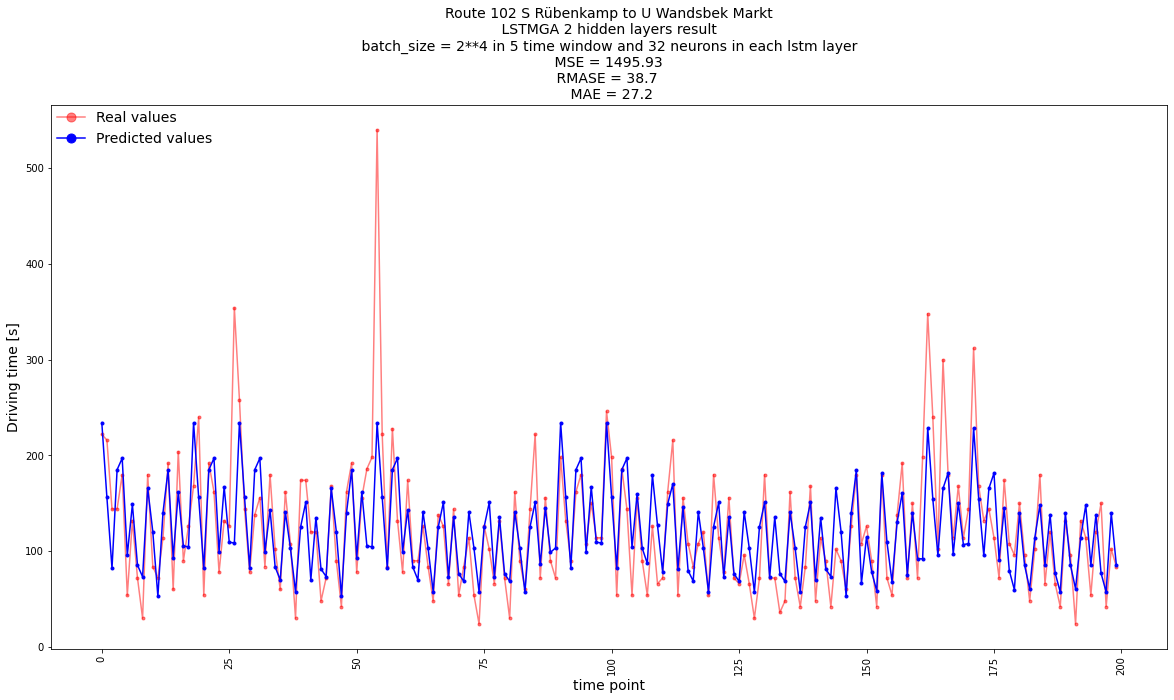

time: 504 ms (started: 2021-01-15 17:43:05 +00:00)


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(inv_y_true[:200], '.-', color='red', label='Real values', alpha=0.5)
plt.plot(inv_y_pred[:200], '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('time point', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result, rmse_result, mae_result = model.evaluate(X_test, y_test)

plt.title(path_name+'\n LSTMGA %.0f hidden layers result \n batch_size = 2**%.0f in %.0f time window and %.0f neurons in each lstm layer \n MSE = %.2f \n RMASE = %.1f  \n MAE = %.1f' 
          % (best_model['n_layers'], best_model['bs_double'], 
             look_back, best_model['n_neurons'], 
             mse, rmse, mae), fontsize = 14)

print('FINISHED')

14/14 [==============================] - 0s 3ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - mae: 0.0417
FINISHED


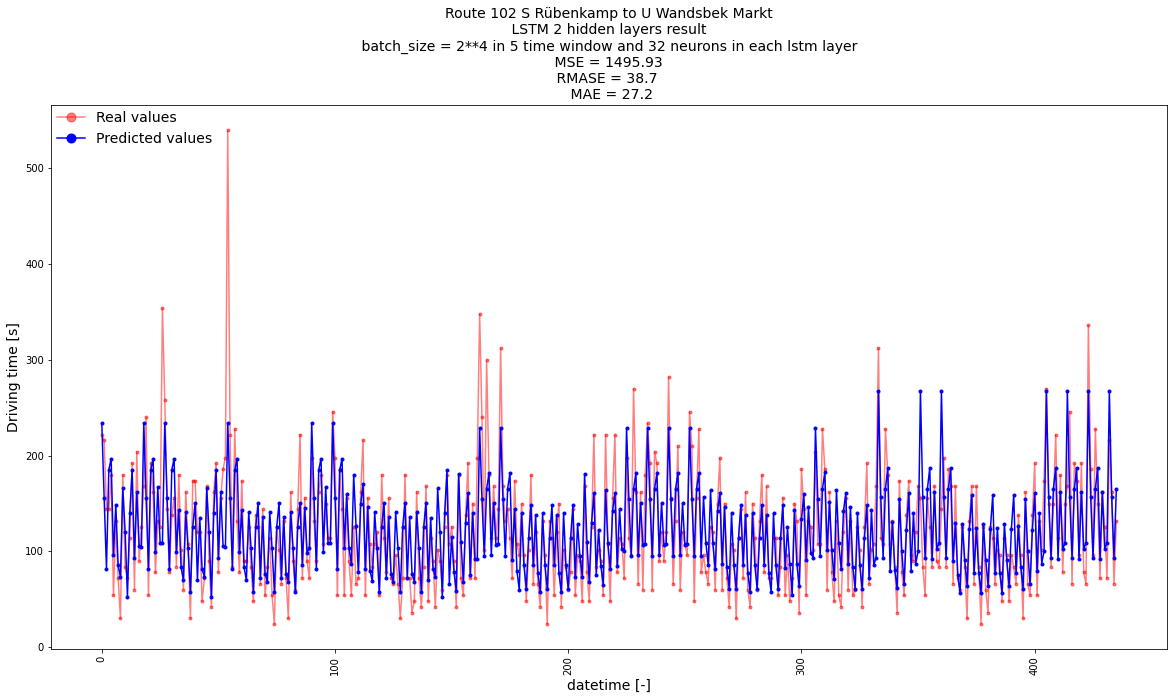

time: 529 ms (started: 2021-01-15 17:43:05 +00:00)


In [ ]:
plt.figure(figsize=(20,10))
plt.plot( inv_y_true, '.-', color='red', label='Real values', alpha=0.5)
plt.plot( inv_y_pred, '.-', color='blue', label='Predicted values', alpha=1)

plt.ylabel(r'Driving time [s]', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

mse_result, rmse_result, mae_result = model.evaluate(X_test, y_test)

plt.title(path_name+'\n LSTM %.0f hidden layers result \n batch_size = 2**%.0f in %.0f time window and %.0f neurons in each lstm layer \n MSE = %.2f \n RMASE = %.1f  \n MAE = %.1f' 
          % (best_model['n_layers'], best_model['bs_double'], 
             look_back, best_model['n_neurons'],  mse, rmse, mae), fontsize = 14)

print('FINISHED')

# Combine results

In [ ]:
comb_result = st_comb_result.copy()
comb_result = comb_result.drop(['Unnamed: 0'], axis=1) #, 'Unnamed: 0.1', 'Unnamed: 0.1.1'

time: 5.04 ms (started: 2021-01-15 17:43:07 +00:00)


In [ ]:
st_comb_result

In [ ]:
comb_result = comb_result.rename(columns= {'Unnamed: 0.1':'index'})

time: 3.25 ms (started: 2021-01-15 17:43:19 +00:00)


In [ ]:
#comb_result = comb_result.loc[comb_result.index>=int(size_trip*np.ceil(best_model['n_timewindow']))].reset_index(drop = True)
#comb_result = comb_result.loc[comb_result.index>=62].reset_index(drop = True)
#comb_result = comb_result[:40]
comb_result

In [ ]:
len(comb_result)

432

time: 7.3 ms (started: 2021-01-15 17:43:36 +00:00)


In [ ]:
len(inv_y_pred[-len(comb_result):])

432

time: 4.32 ms (started: 2021-01-15 17:43:38 +00:00)


In [ ]:
(inv_y_pred[-len(comb_result):])

In [ ]:
inv_y_pred[int(np.floor(size_trip*best_model['n_timewindow'])):]

In [ ]:
comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name] = inv_y_pred[-len(comb_result):]
#comb_result= comb_result.drop(['LSTMGA_test|_'], axis=1)
#comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name] = inv_y_pred
#comb_result = comb_result[20:].reset_index(drop = True)
comb_result

In [ ]:
if route == 202:
  route_unique = np.array(['Lufthansa-Basis (Haupteingang)|Obenhauptstraße',
        'Obenhauptstraße|Alsterkrugchaussee (Mitte)',
        'Alsterkrugchaussee (Mitte)|Moltrechtweg',
        'Moltrechtweg|Brabandstraße', 'Brabandstraße|Hindenburgstraße',
        'Hindenburgstraße|U Alsterdorf', 'U Alsterdorf|Sydneystraße',
        'Sydneystraße|Manilabrücke', 'Manilabrücke|Kapstadtring',
        'Kapstadtring|S Rübenkamp', 'S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
        'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
        'U Habichtstraße|Habichtstraße (Mitte)',
        'Habichtstraße (Mitte)|U Alter Teichweg',
        'U Alter Teichweg|U Straßburger Straße',
        'U Straßburger Straße|Wandsbeker Allee',
        'Wandsbeker Allee|U Wandsbek Markt'], dtype= object)
else:
  route_unique = (comb_result.Path.unique())
route_unique

array(['S Rübenkamp|AK Barmbek', 'AK Barmbek|Hartzloh',
       'Hartzloh|Habichtsplatz', 'Habichtsplatz|U Habichtstraße',
       'U Habichtstraße|Habichtstraße (Mitte)',
       'Habichtstraße (Mitte)|U Alter Teichweg',
       'U Alter Teichweg|U Straßburger Straße',
       'U Straßburger Straße|Wandsbeker Allee',
       'Wandsbeker Allee|U Wandsbek Markt'], dtype=object)

time: 11.9 ms (started: 2021-01-15 17:44:21 +00:00)


In [ ]:
comb_result['Path']

0                      S Rübenkamp|AK Barmbek
1                         AK Barmbek|Hartzloh
2                      Hartzloh|Habichtsplatz
3               Habichtsplatz|U Habichtstraße
4       U Habichtstraße|Habichtstraße (Mitte)
                        ...                  
427     U Habichtstraße|Habichtstraße (Mitte)
428    Habichtstraße (Mitte)|U Alter Teichweg
429     U Alter Teichweg|U Straßburger Straße
430     U Straßburger Straße|Wandsbeker Allee
431         Wandsbeker Allee|U Wandsbek Markt
Name: Path, Length: 432, dtype: object

time: 11.2 ms (started: 2021-01-15 17:44:24 +00:00)


In [ ]:
#add new column for trip accumulate
comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'] = 0
a = 0
for i in range(len(comb_result)):
  if comb_result['Path'][i] == route_unique[0]: #the first path
    a = comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name][i]
    comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'][i] = a
  else:
    a += comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name][i] 
    comb_result['LSTMGA_'+str(best_model['n_layers'])+'H_'+bs_name+'_trip_cum'][i] = a
comb_result[:]

In [ ]:
#comb_result = comb_result[['Date time','Path','Actual','Actual_trip_cum','MLP','MLP_trip_cum','MLP_Kalman','MLP_Kalman_trip_cum','LSTM_2H_128','LSTM_2H_128_trip_cum','LSTMGA_2H_16','LSTMGA_2H_16_trip_cum','MLPGA_4H_16','MLPGA_4H_16_trip_cum']]

time: 4.11 ms (started: 2021-01-15 17:47:12 +00:00)


# Export data

In [ ]:
#path_file = 'combine_result'+path_end+'.csv'
#comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/Tue_1_5_combine_result_"+path_end+".csv")
#comb_result_rmse.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/Tue_1_5_combine_result_rmse_"+path_end+".csv")
#!cp path_file "/content/drive/My Drive/Colab Notebooks/Thesis"

comb_result.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_"+path_end+"_m"+str(month)+".csv")
#comb_result_rmse.to_csv("/content/drive/My Drive/Colab Notebooks/Thesis/combine_result_rmse_"+path_end+"_m"+str(month)+".csv")

time: 38.4 ms (started: 2021-01-15 17:47:22 +00:00)
